<table>
<tr>
<td width=15%><img src="https://www.nitrkl.ac.in/assets/images/logo.png"></img></td>
<td><center><h1>National Institute of Technology
Rourkela, Odisha, India, 769008</h1><h2>Department of Computer Science Engineering</h2></center></td>
</tr>
<tr><td colspan=2><center><h3>SUMMER INTERNSHIP cum TRAINNING PROGRAMME</h3></br>
            <b>(STTP: Deep Learning for Healthcare(DLH-2025))</b></center></td></tr>
</table>

# TensorFlow

TensorFlow is an open-source machine-learning framework developed by Google. It is written in Python, making it accessible and easy to understand. It is designed to build and train machine learning (ML) and deep learning models.

* It is highly scalable for both research and production.
* It supports CPUs, GPUs, and TPUs for faster computation.
* TensorFlow provides built-in tools for visualization and debugging.
* It works seamlessly with other AI frameworks and libraries.

pip install tensorflow 

# Basic Neural Network

# Multi-Layer Perceptron Learning in Tensorflow

Multi-Layer Perceptron (MLP) consists of fully connected dense layers that transform input data from one dimension to another. It is called multi-layer because it contains an input layer, one or more hidden layers and an output layer. The purpose of an MLP is to model complex relationships between inputs and outputs.

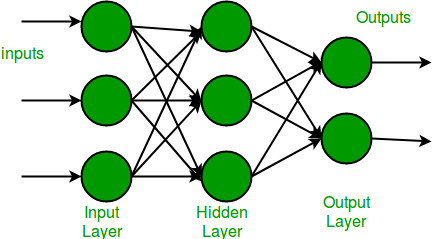

# Implementing Multi Layer Perceptron

In this section, we will guide through building a neural network using TensorFlow.

# 1. Importing Modules and Loading Dataset

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


# 2. Loading and Normalizing Image Data

Next we normalize the image data by dividing by 255 (since pixel values range from 0 to 255) which helps in faster convergence during training.

In [3]:
gray_scale = 255

x_train = x_train.astype('float32') / gray_scale
x_test = x_test.astype('float32') / gray_scale

print("Feature matrix (x_train):", x_train.shape)
print("Target matrix (y_train):", y_train.shape)
print("Feature matrix (x_test):", x_test.shape)
print("Target matrix (y_test):", y_test.shape)

Feature matrix (x_train): (60000, 28, 28)
Target matrix (y_train): (60000,)
Feature matrix (x_test): (10000, 28, 28)
Target matrix (y_test): (10000,)


# 3. Visualizing Data

To understand the data better we plot the first 100 training samples each representing a digit.

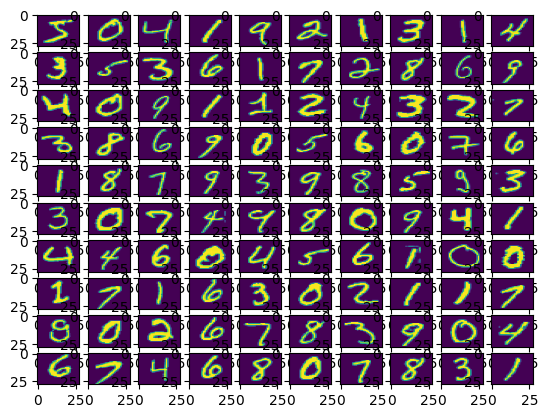

In [4]:
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k].reshape(28, 28), aspect='auto')
        k += 1
plt.show()

# 4. Building the Neural Network Model

Here we build a Sequential neural network model. The model consists of:

* Flatten Layer: Reshapes 2D input (28x28 pixels) into a 1D array of 784 elements.
* Dense Layers: Fully connected layers with 256 and 128 neurons, both using the relu activation function.
* Output Layer: The final layer with 10 neurons representing the 10 classes of digits (0-9) with sigmoid activation.

In [5]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='sigmoid'),  
    Dense(128, activation='sigmoid'), 
    Dense(10, activation='softmax'),  
])

# 5. Compiling the Model

Once the model is defined we compile it by specifying:

* Optimizer: Adam for efficient weight updates.
* Loss Function: Sparse categorical cross entropy, which is suitable for multi-class classification.
* Metrics: Accuracy to evaluate model performance.

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 6. Training the Model
We train the model on the training data using 10 epochs and a batch size of 2000. We also use 20% of the training data for validation to monitor the model’s performance on unseen data during training.

In [7]:
mod = model.fit(x_train, y_train, epochs=10, 
          batch_size=2000, 
          validation_split=0.2)
          
print(mod)

Epoch 1/10
24/24 [==============================] - 70s 2s/step - loss: 2.0173 - accuracy: 0.4422 - val_loss: 1.6178 - val_accuracy: 0.7082
Epoch 2/10
24/24 [==============================] - 35s 2s/step - loss: 1.2782 - accuracy: 0.7517 - val_loss: 0.9349 - val_accuracy: 0.8177
Epoch 3/10
24/24 [==============================] - 0s 15ms/step - loss: 0.7922 - accuracy: 0.8271 - val_loss: 0.6182 - val_accuracy: 0.8684
Epoch 4/10
24/24 [==============================] - 0s 9ms/step - loss: 0.5664 - accuracy: 0.8677 - val_loss: 0.4671 - val_accuracy: 0.8888
Epoch 5/10
24/24 [==============================] - 17s 738ms/step - loss: 0.4490 - accuracy: 0.8888 - val_loss: 0.3853 - val_accuracy: 0.9031
Epoch 6/10
24/24 [==============================] - 0s 7ms/step - loss: 0.3824 - accuracy: 0.9014 - val_loss: 0.3393 - val_accuracy: 0.9100
Epoch 7/10
24/24 [==============================] - 0s 7ms/step - loss: 0.3413 - accuracy: 0.9087 - val_loss: 0.3096 - val_accuracy: 0.9162
Epoch 8/10
24/24

# 7. Evaluating the Model

After training we evaluate the model on the test dataset to determine its performance.

In [8]:
results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss, Test accuracy:', results)

Test loss, Test accuracy: [0.2596805989742279, 0.9261999726295471]


# 8. Visualizing Training and Validation Loss VS Accuracy

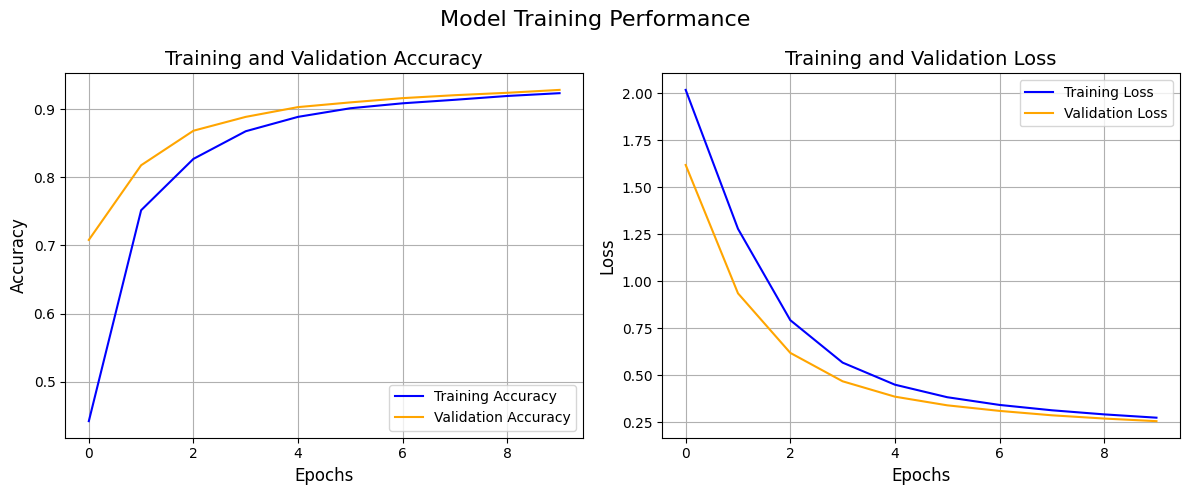

In [9]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(mod.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(mod.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(mod.history['loss'], label='Training Loss', color='blue')
plt.plot(mod.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

plt.suptitle("Model Training Performance", fontsize=16)
plt.tight_layout()
plt.show()

# Convolution Neural Network

Convolutional Neural Network (CNN) is an advanced version of artificial neural networks (ANNs), primarily designed to extract features from grid-like matrix datasets. This is particularly useful for visual datasets such as images or videos, where data patterns play a crucial role. CNNs are widely used in computer vision applications due to their effectiveness in processing visual data.

CNNs consist of multiple layers like the input layer, Convolutional layer, pooling layer, and fully connected layers. Let's learn more about CNNs in detail.

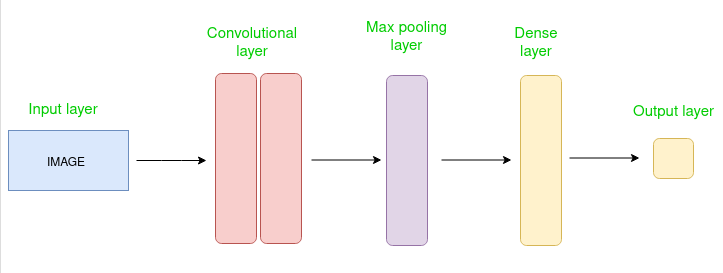

Here's a complete example of building a Convolutional Neural Network (CNN) from scratch using TensorFlow/Keras to classify handwritten digits from the MNIST dataset:

Step-by-step Overview:
1. Import libraries

2. Load and preprocess the MNIST dataset

3. Build the CNN model

4. Compile the model

5. Train the model

6. Evaluate performance

7. Plot metrics and predictions (optional)

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Step 1: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Step 2: Preprocess the data
# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape to add channel dimension (28x28x1)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Step 3: Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [11]:
# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64,
                    validation_split=0.1, verbose=2)



Epoch 1/5
844/844 - 8s - loss: 0.2679 - accuracy: 0.9190 - val_loss: 0.0605 - val_accuracy: 0.9838 - 8s/epoch - 10ms/step
Epoch 2/5
844/844 - 6s - loss: 0.0891 - accuracy: 0.9743 - val_loss: 0.0388 - val_accuracy: 0.9875 - 6s/epoch - 7ms/step
Epoch 3/5
844/844 - 7s - loss: 0.0682 - accuracy: 0.9796 - val_loss: 0.0338 - val_accuracy: 0.9892 - 7s/epoch - 8ms/step
Epoch 4/5
844/844 - 6s - loss: 0.0564 - accuracy: 0.9832 - val_loss: 0.0326 - val_accuracy: 0.9910 - 6s/epoch - 7ms/step
Epoch 5/5
844/844 - 6s - loss: 0.0469 - accuracy: 0.9861 - val_loss: 0.0288 - val_accuracy: 0.9920 - 6s/epoch - 7ms/step


313/313 - 1s - loss: 0.0274 - accuracy: 0.9913 - 1s/epoch - 4ms/step

 Test accuracy: 0.9913


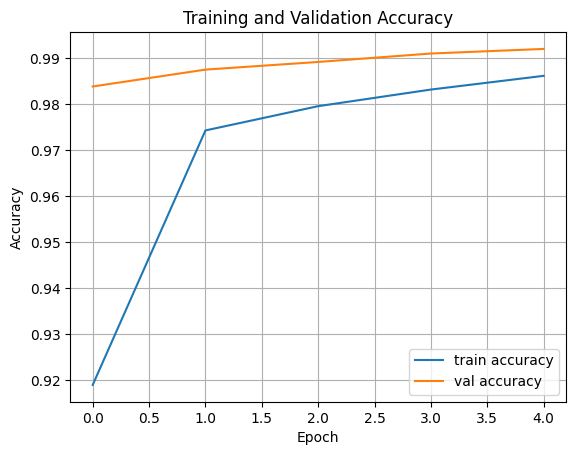

In [12]:
# Step 6: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\n Test accuracy: {test_acc:.4f}')

# Step 7 (Optional): Plot training history
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.grid(True)
plt.show()
